<p style="background: orange;  color: blue; text-align: center;letter-spacing: 2px; line-height: 150%; font-weight:bold; font-size:xx-large;">The Partition Transform</p>
<p style="background: color: blue; text-align: center;">Peter Luschny, March 2016</p>

<p>This is the HTML version of the notebook. The actual notebook can be found 
<a href = "luschny.de/math/seq/PartitionTransform.ipynb">here</a>.
Some background is explained on my blog on the 
<a href = "http://oeis.org/wiki/User:Peter_Luschny/P-Transform">
OEIS-Wiki</a>.</p> 

<p>We introduce a sequence-to-triangle transformation which we will call 
the partition transformation (or short P-transformation).
The name derives from the main loop which runs over all partitions of n. </p>
<p>We say, $p$ is an integer partition of $n$ or 
$p \in P_{n}$ $\Longleftrightarrow$ $p = (p_{1}, \ldots, p_{n}), \ p_{i}$ integer, $\sum_{1\le i \le n} p  = n$ and $p_{1} \ge p_{2}  \ge \ldots \ge p_{n} \ge 0.$   </p>

In [1]:
%load_ext sage

from functools import cache
from typing import Callable
from sage.combinat.partition import Partition, Partitions
from sage.all import ZZ, QQ, factorial, binomial, product, matrix, srange, oeis
from sage.all import rising_factorial, falling_factorial, bell_number, var
from sage.all import stirling_number1, stirling_number2
from sage.all import SR, PolynomialRing, expand, flatten
from sage.all import plot, show

In [2]:
def PartitionTransform(n: int, f: Callable, norm=None) -> list[int]:
    if n == 0:
        return [1]
    R = [0] * (n + 1)
    for q in Partitions(n):
        p = q + [0]
        R[q[0]] += (-1)^q[0] * product(
            binomial(p[j], p[j + 1]) * f(j + 1)^p[j] 
            for j in range(len(q)))

    if norm == None: return R
    return [norm(n, k) * R[k] for k in range(n + 1)]

In [3]:
lah2 = lambda n: 1 if n == 1 else ((n - 1)^2 + 1) / (n * (4 * n - 2))
norm = lambda n, k: (-1) ^ k * factorial(2 * n) // factorial(2 * k)

for n in range(8):
    print(PartitionTransform(n, lah2, norm))

[1]
[0, 1]
[0, 2, 1]
[0, 10, 10, 1]
[0, 100, 140, 28, 1]
[0, 1700, 2900, 840, 60, 1]
[0, 44200, 85800, 31460, 3300, 110, 1]
[0, 1635400, 3476200, 1501500, 203060, 10010, 182, 1]


In [4]:
eul = lambda n: 1 / ((2 * n - 1) * (2 * n))
nrm = lambda n, k: (-1) ^ k * factorial(2 * n)

for n in range(8):
    print(PartitionTransform(n, eul, nrm))

[1]
[0, 1]
[0, 1, 6]
[0, 1, 30, 90]
[0, 1, 126, 1260, 2520]
[0, 1, 510, 13230, 75600, 113400]
[0, 1, 2046, 126720, 1580040, 6237000, 7484400]
[0, 1, 8190, 1171170, 28828800, 227026800, 681080400, 681080400]


In [5]:
ward = lambda n: 1 / (n + 1)
norm = lambda n, k: (-1) ^ k * falling_factorial(n + k, n)

for n in range(8):
    print(PartitionTransform(n, ward, norm))

[1]
[0, 1]
[0, 1, 3]
[0, 1, 10, 15]
[0, 1, 25, 105, 105]
[0, 1, 56, 490, 1260, 945]
[0, 1, 119, 1918, 9450, 17325, 10395]
[0, 1, 246, 6825, 56980, 190575, 270270, 135135]


In [6]:
def PMatrix(dim, f, norm=None, inverse=False, reduced=False):
    i = 1
    F = [1]

    if reduced:
        while i <= dim:
            F.append(f(i))
            i += 1
    else:
        while i <= dim:
            F.append(F[i - 1] * f(i))
            i += 1

    C = [[0 for k in range(m + 1)] for m in range(dim)]
    C[0][0] = 1
    
    if inverse:
        for m in range(1, dim):
            C[m][m] = -C[m - 1][m - 1] / F[1]
            for k in range(m - 1, 0, -1):
                C[m][k] = (
                    -( C[m - 1][k - 1]
                       + sum(F[i] * C[m][k + i - 1] 
                       for i in range(2, m - k + 2))
                     ) / F[1]
                )
    else:
        for m in range(1, dim):
            C[m][m] = -C[m - 1][m - 1] * F[1]
            for k in range(m - 1, 0, -1):
                C[m][k] = -sum(F[i] * C[m - i][k - 1] 
                          for i in range(1, m - k + 2))

    if norm == None: return C
    for m in range(1, dim):
        for k in range(1, m + 1):
            C[m][k] *= norm(m, k)
    return C

<table style="width: 100%; text-align:center; background-color:#CDE1BA "> 
<tr style="background-color:#FFD700; color:blue">
<td>1</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>
<tr style="background-color:#FFD700; color:blue">
<td>0</td>
<td>-x<sub>1</sub></td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>
<tr style="background-color:#FFD700; color:blue">
<td>0</td>
<td>-x<sub>1</sub>x<sub>2</sub></td>
<td>x<sub>1</sub><sup>2</sup></td>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>
<tr style="background-color:#FFD700; color:blue">
<td>0</td>
<td>-x<sub>1</sub>x<sub>2</sub>x<sub>3</sub></td>
<td>2x<sub>1</sub><sup>2</sup>x<sub>2</sub></td>
<td>-x<sub>1</sub><sup>3</sup></td>
<td>0</td>
<td>0</td>
</tr>
<tr style="background-color:#FFD700; color:blue">
<td>0</td>
<td>-x<sub>1</sub>x<sub>2</sub>x<sub>3</sub>x<sub>4</sub></td>
<td>2x<sub>1</sub><sup>2</sup>x<sub>2</sub>x<sub>3</sub>+x<sub>1</sub><sup>2</sup>x<sub>2</sub><sup>2</sup></td>
<td>-3x<sub>1</sub><sup>3</sup>x<sub>2</sub></td>
<td>x<sub>1</sub><sup>4</sup></td>
<td>0</td>
</tr>
<tr style="background-color:#FFD700; color:blue">
<td>0</td>
<td>-x<sub>1</sub>x<sub>2</sub>x<sub>3</sub>x<sub>4</sub>x<sub>5</sub></td>
<td>2x<sub>1</sub><sup>2</sup>x<sub>2</sub>x<sub>3</sub>x<sub>4</sub>+2x<sub>1</sub><sup>2</sup>x<sub>2</sub><sup>2</sup>x<sub>3</sub></td>
<td>-3x<sub>1</sub><sup>3</sup>x<sub>2</sub>x<sub>3</sub>&minus;3x<sub>1</sub><sup>3</sup>x<sub>2</sub><sup>2</sup></td>
<td>4x<sub>1</sub><sup>4</sup>x<sub>2</sub></td>
<td>-x<sub>1</sub><sup>5</sup></td>
</tr>
</table>


In [7]:
f = lambda n: var('x' + str(n))
PMatrix(5, f)

[[1],
 [0, -x1],
 [0, -x1*x2, x1^2],
 [0, -x1*x2*x3, 2*x1^2*x2, -x1^3],
 [0, -x1*x2*x3*x4, x1^2*x2^2 + 2*x1^2*x2*x3, -3*x1^3*x2, x1^4]]

In [8]:
f = lambda n: var("x" + str(n))
P = PMatrix(5, f, inverse=True)

for p in P:
    print(p)

[1]
[0, -1/x1]
[0, -x2/x1^2, x1^(-2)]
[0, -(2*x2^2/x1^2 - x2*x3/x1^2)/x1, 2*x2/x1^3, -1/x1^3]
[0, -(x2*((2*x2^2/x1^2 - x2*x3/x1^2)/x1 + 3*x2^2/x1^3 - x2*x3/x1^3) - 3*x2^2*x3/x1^3 + x2*x3*x4/x1^3)/x1, ((2*x2^2/x1^2 - x2*x3/x1^2)/x1 + 3*x2^2/x1^3 - x2*x3/x1^3)/x1, -3*x2/x1^4, x1^(-4)]


In [9]:
# The above output is a bit messy. 
# Additionally most of the time we can require x1 = 1.
# So let's clean this up:

[[expand(p).substitute(x1=1) for p in L] for L in P] 

[[1],
 [0, -1],
 [0, -x2, 1],
 [0, -2*x2^2 + x2*x3, 2*x2, -1],
 [0, -5*x2^3 + 5*x2^2*x3 - x2*x3*x4, 5*x2^2 - 2*x2*x3, -3*x2, 1]]

In [10]:
PMatrix(8, lambda n: n)

[[1],
 [0, -1],
 [0, -2, 1],
 [0, -6, 4, -1],
 [0, -24, 16, -6, 1],
 [0, -120, 72, -30, 8, -1],
 [0, -720, 372, -152, 48, -10, 1],
 [0, -5040, 2208, -828, 272, -70, 12, -1]]

In [11]:
def PEvaluateAt(n, f, val = None, norm = None):
    P = PMatrix(n, f, norm)
    if val == None: val = var('x')
    p = [sum([val^k*P[j][k] for k in (0..j)]) for j in range(n)]
    return p

# for linguistic reason only, equivalent to PEvaluateAt(n, f, norm)
PAsPolynomials = lambda n, f, norm=None: PEvaluateAt(n, f, norm = norm)

In [12]:
PAsPolynomials(5, lambda n: n)

[1, -x, x^2 - 2*x, -x^3 + 4*x^2 - 6*x, x^4 - 6*x^3 + 16*x^2 - 24*x]

In [13]:
PEvaluateAt(9, lambda n: n, val = 1)

[1, -1, -1, -3, -13, -71, -461, -3447, -29093]

In [14]:
def PAnalyser(Len, f, norm = None):
    print("As polynomials:")
    P = PAsPolynomials(Len-2, f, norm)
    for p in P: print(p)
    
    print("As triangle:")
    P = PMatrix(Len-2, f, norm)    
    for p in P: print(p)
    
    print("x=1:   ", PEvaluateAt(Len,f,   1,norm))
    print("x=-1:  ", PEvaluateAt(Len,f,  -1,norm))
    print("x=1/2: ", PEvaluateAt(Len,f, 1/2,lambda n,k: 2^n*norm(n,k))) 
    print("x=-1/2:", PEvaluateAt(Len,f,-1/2,lambda n,k: 2^n*norm(n,k)))


$$ E_{2n} = (2n)! \sum_{p \in P_n} (-1)^{p_1} 
\binom{p_1}{p_2}\binom{p_2}{p_3} \ldots \binom{p_{n-1}}{p_{n}} 
\left(\frac{1}{1 \cdot 2}\right)^{p_1} \left(\frac{1}{3 \cdot 4}\right)^{p_2}  \ldots
\left(\frac{1}{(2n-1)2n}\right)^{p_n} 
 $$
</p>

In [15]:
# Euler(2n)
eul = lambda n: 1 / ((2 * n - 1) * (2 * n))
nrm = lambda n, k: factorial(2 * n)

PAnalyser(8, eul, nrm)

As polynomials:
1
-x
6*x^2 - x
-90*x^3 + 30*x^2 - x
2520*x^4 - 1260*x^3 + 126*x^2 - x
-113400*x^5 + 75600*x^4 - 13230*x^3 + 510*x^2 - x
As triangle:
[1]
[0, -1]
[0, -1, 6]
[0, -1, 30, -90]
[0, -1, 126, -1260, 2520]
[0, -1, 510, -13230, 75600, -113400]
x=1:    [1, -1, 5, -61, 1385, -50521, 2702765, -199360981]
x=-1:   [1, 1, 7, 121, 3907, 202741, 15430207, 1619195761]
x=1/2:  [1, -1, 4, -34, 496, -11056, 349504, -14873104]
x=-1/2: [1, 1, 8, 154, 5552, 321616, 27325088, 3200979664]


\begin{equation} B_{2n} = \frac{(2n)!}{(2-2^{2n})} \sum_{p \in P_n} (-1)^{p_1} 
\binom{p_1}{p_2}\binom{p_2}{p_3} \ldots \binom{p_{n-1}}{p_{n}} 
\left(\frac{1}{2 \cdot 3}\right)^{p_1} \left(\frac{1}{4 \cdot 5}\right)^{p_2}  
\ldots \left(\frac{1}{2n  (2n+1)}\right)^{p_n} 
\end{equation}
</p>

In [16]:
# Bernoulli(2n)
bern = lambda n: 1 / ((2 * n) * (2 * n + 1))
norm = lambda n, k: factorial(2 * n) / (2 - 2 ^ (2 * n))

PAnalyser(6, bern, norm)

As polynomials:
1
1/6*x
-1/21*x^2 + 1/70*x
5/93*x^3 - 1/31*x^2 + 1/434*x
As triangle:
[1]
[0, 1/6]
[0, 1/70, -1/21]
[0, 1/434, -1/31, 5/93]
x=1:    [1, 1/6, -1/30, 1/42, -1/30, 5/66]
x=-1:   [1, -1/6, -13/210, -115/1302, -2911/11430, -13509/11242]
x=1/2:  [1, 1/6, -2/105, -1/651, 88/5715, -24/803]
x=-1/2: [1, -1/6, -8/105, -83/651, -824/1905, -40504/16863]


In [17]:
def Pcoeffsum(len, f, norm=None):
    R, C = [1], [1] + [0] * (len - 1)

    for n in range(1, len):
        for k in range(n, 0, -1):
            C[k] = C[k - 1] * f(k)
        C[0] = -sum(C[k] for k in range(1, n + 1))
        if norm == None:
            R.append(C[0])
        else:
            R.append(C[0] * norm(n))
    return R

In [18]:
print(Pcoeffsum(9, lambda n: n))
print(PEvaluateAt(9, lambda n: n, 1)) 

[1, -1, -1, -3, -13, -71, -461, -3447, -29093]
[1, -1, -1, -3, -13, -71, -461, -3447, -29093]


In [19]:
def A001896_list(len):
    R, C = [1], [1] + [0] * (len - 1)
    for n in range(1, len):
        for k in range(n, 0, -1):
            C[k] = C[k - 1] / (8 * k * (2 * k + 1))
        C[0] = -sum(C[k] for k in range(1, n + 1))
        R.append((C[0] * factorial(2 * n)).numerator())
    return R


print(A001896_list(8))

[1, -1, 7, -31, 127, -2555, 1414477, -57337]


In [20]:
def bernoulli_list(len):
    f, R, C = 1, [1], [1] + [0] * (len - 1)
    for n in range(1, len):
        f *= n
        for k in range(n, 0, -1):
            C[k] = C[k - 1] / (k + 1)
        C[0] = -sum(C[k] for k in range(1, n + 1))
        R.append(C[0] * f)
    return R


print(bernoulli_list(17))

[1, -1/2, 1/6, 0, -1/30, 0, 1/42, 0, -1/30, 0, 5/66, 0, -691/2730, 0, 7/6, 0, -3617/510]


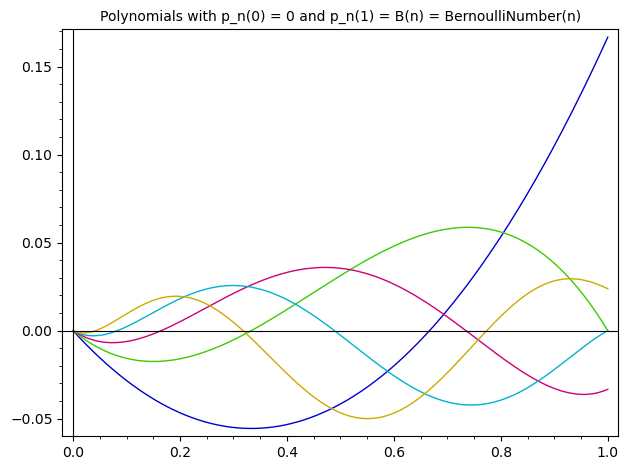

In [21]:
P = plot([1/2*x^2 - 1/3*x, -3/4*x^3 + x^2 - 1/4*x, 3/2*x^4 - 3*x^3 + 5/3*x^2 
-1/5*x, -15/4*x^5 + 10*x^4 - 35/4*x^3 + 8/3*x^2 - 1/6*x,  45/4*x^6 - 75/2*x^5
+ 45*x^4 -137/6*x^3 + 17/4*x^2 - 1/7*x], (x,0,1))
show(P, frame=True, title=
'Polynomials with p_n(0) = 0 and p_n(1) = B(n) = BernoulliNumber(n)')

In [22]:
def PInverseSequence(n, f, norm=None):
    M = PMatrix(n, f, norm, inverse=True)
    return [M[j][1] for j in range(1, n)]

print(PInverseSequence(8, lambda n: 1))
print(PInverseSequence(8, lambda n: n))
print(PInverseSequence(8, lambda n: n ^ 2))
print(PInverseSequence(8, lambda n: factorial(n)))

[-1, -1, -1, -1, -1, -1, -1]
[-1, -2, -2, -4, 4, -48, 336]
[-1, -4, 4, -176, 5200, -222720, 12509184]
[-1, -2, 4, -208, 31456, -24408768, 125014717056]


In [23]:
eul = lambda n: 1 / ((2 * n - 1) * (2 * n))
nrm = lambda n, k: factorial(2 * n) / 4^k

PMatrix(7, eul, nrm, inverse=True)

[[1],
 [0, -1],
 [0, -2, 6],
 [0, -16, 60, -90],
 [0, -288, 1176, -2520, 2520],
 [0, -9216, 39360, -98280, 151200, -113400],
 [0, -460800, 2023296, -5504400, 10311840, -12474000, 7484400]]

In [24]:
import time

def timeit(statement):
    durations = []
    for i in range(3):
        start = time.time()
        eval(statement)
        end = time.time()
        t = end - start
        durations.append(t)
    return min(durations)

def benchmark(stmt):
    t = timeit(stmt)
    r = round(t*1000, 3)
    print("%s best time: %s ms" % (stmt, r))

In [25]:
for n in range(10, 40, 10):
    benchmark("PartitionTransform(%d, lambda n: n)" % n)

PartitionTransform(10, lambda n: n) best time: 17.419 ms
PartitionTransform(20, lambda n: n) best time: 298.019 ms
PartitionTransform(30, lambda n: n) best time: 3720.388 ms


In [26]:
for n in range(10, 40, 10):
    benchmark("PMatrix(%d, lambda n: n)" % n)

PMatrix(10, lambda n: n) best time: 0.463 ms
PMatrix(20, lambda n: n) best time: 2.179 ms
PMatrix(30, lambda n: n) best time: 6.547 ms


In [27]:

def PMultiCoefficients(dim, norm=None, inverse=False):
    def coeff(P, n, k):
        if k == 0: return [k^n]
        return SR(P[n][k]).fraction(ZZ).numerator().coefficients() 

    f = lambda n: var("x" + str(n))
    P = PMatrix(dim, f, norm, inverse)

    return [[coeff(P, n, k) for k in range(0, n + 1)] for n in range(dim)]

In [28]:
PMultiCoefficients(8)

[[[1]],
 [[0], [-1]],
 [[0], [-1], [1]],
 [[0], [-1], [2], [-1]],
 [[0], [-1], [1, 2], [-3], [1]],
 [[0], [-1], [2, 2], [-3, -3], [4], [-1]],
 [[0], [-1], [1, 2, 2], [-1, -6, -3], [6, 4], [-5], [1]],
 [[0], [-1], [2, 2, 2], [-3, -3, -6, -3], [4, 12, 4], [-10, -5], [6], [-1]]]

In [29]:
PMultiCoefficients(6, inverse = True)

[[[1]],
 [[0], [-1]],
 [[0], [-1], [1]],
 [[0], [-2, 1], [2], [-1]],
 [[0], [-5, 5, -1], [5, -2], [-3], [1]],
 [[0], [-14, 21, -3, -6, 1], [14, -12, 2], [-9, 3], [4], [-1]]]

In [30]:
stirset2   = lambda n: 1 if n == 1 else               1 / (n * (4 * n - 2)) 
stircycle2 = lambda n: 1 if n == 1 else       (n - 1)^2 / (n * (4 * n - 2)) 
lah2       = lambda n: 1 if n == 1 else ((n - 1)^2 + 1) / (n * (4 * n - 2)) 
norm       = lambda n,k: (-1)^k * factorial(2 * n) // factorial(2 * k)

In [31]:
M = PMatrix(7, stirset2, norm)
for m in M:
    print(m)
    
M = PMatrix(7, stirset2, norm, inverse=True)
for m in M:
    print(m)

[1]
[0, 1]
[0, 1, 1]
[0, 1, 5, 1]
[0, 1, 21, 14, 1]
[0, 1, 85, 147, 30, 1]
[0, 1, 341, 1408, 627, 55, 1]
[1]
[0, 1]
[0, 1, 1]
[0, 4, 5, 1]
[0, 36, 49, 14, 1]
[0, 576, 820, 273, 30, 1]
[0, 14400, 21076, 7645, 1023, 55, 1]


In [32]:
M = PMatrix(7, stircycle2, norm)  # A204579
for m in M:
    print(m)

M = PMatrix(7, stircycle2, norm, inverse=True)
for m in M:
    print(m)

[1]
[0, 1]
[0, 1, 1]
[0, 4, 5, 1]
[0, 36, 49, 14, 1]
[0, 576, 820, 273, 30, 1]
[0, 14400, 21076, 7645, 1023, 55, 1]
[1]
[0, 1]
[0, 1, 1]
[0, 1, 5, 1]
[0, 1, 21, 14, 1]
[0, 1, 85, 147, 30, 1]
[0, 1, 341, 1408, 627, 55, 1]


In [33]:
M = PMatrix(7, lah2, norm)
for m in M:
    print(m)

M = PMatrix(7, lah2, norm, inverse=True)
for m in M:
    print(m)

[1]
[0, 1]
[0, 2, 1]
[0, 10, 10, 1]
[0, 100, 140, 28, 1]
[0, 1700, 2900, 840, 60, 1]
[0, 44200, 85800, 31460, 3300, 110, 1]
[1]
[0, 1]
[0, 2, 1]
[0, 10, 10, 1]
[0, 100, 140, 28, 1]
[0, 1700, 2900, 840, 60, 1]
[0, 44200, 85800, 31460, 3300, 110, 1]


In [34]:
def T(n, k, w):
    if n == k: return 1
    if k < 0 or k > n: return 0
    return T(n - 1, k - 1, w) + w(n, k) * T(n - 1, k, w)

stirset3 = lambda n, k: k^3
stircycle3 = lambda n, k: (n - 1)^3
lah3 = lambda n, k: stircycle3(n, k) + stirset3(n, k)

for n in range(8):
    print([T(n, k, stirset3) for k in range(n + 1)])
for n in range(8):
    print([T(n, k, stircycle3) for k in range(n + 1)])
for n in range(8):
    print([T(n, k, lah3) for k in range(n + 1)])

[1]
[0, 1]
[0, 1, 1]
[0, 1, 9, 1]
[0, 1, 73, 36, 1]
[0, 1, 585, 1045, 100, 1]
[0, 1, 4681, 28800, 7445, 225, 1]
[0, 1, 37449, 782281, 505280, 35570, 441, 1]
[1]
[0, 1]
[0, 1, 1]
[0, 8, 9, 1]
[0, 216, 251, 36, 1]
[0, 13824, 16280, 2555, 100, 1]
[0, 1728000, 2048824, 335655, 15055, 225, 1]
[0, 373248000, 444273984, 74550304, 3587535, 63655, 441, 1]
[1]
[0, 1]
[0, 2, 1]
[0, 18, 18, 1]
[0, 504, 648, 72, 1]
[0, 32760, 47160, 7200, 200, 1]
[0, 4127760, 6305040, 1141560, 45000, 450, 1]
[0, 895723920, 1416456720, 283704120, 13741560, 198450, 882, 1]


In [35]:
StirlingSetStar   = lambda n: 1 / (n + 1)
StirlingCycleStar = lambda n: n / (n + 1)

norm = lambda n, k: (-1)^k * factorial(2 * n)

\begin{equation}
\genfrac\{\}{0pt}{}{n}{k}^{\star}
= \frac{(2n)!}{(n+k)^{\underline{n}}} \sum_{m=0}^{k} (-1)^{m+k} \binom{n+k}{n+m}\genfrac\{\}{0pt}{}{n+m}{m} 
\end{equation}

\begin{equation}
\genfrac{ [ }{ ] }{0pt}{}{n}{k}^{\star} 
= \frac{(2n)!}{(n+k)^{\underline{n}}} \sum_{m=0}^{k} (-1)^{m+k} \binom{n+k}{n+m}\genfrac{[ }{ ] }{0pt}{}{n+m}{m} 
\end{equation}


In [36]:
PMatrix(7, StirlingSetStar, norm)

[[1],
 [0, 1],
 [0, 4, 6],
 [0, 30, 120, 90],
 [0, 336, 2800, 5040, 2520],
 [0, 5040, 80640, 264600, 302400, 113400],
 [0, 95040, 2827440, 15190560, 29937600, 24948000, 7484400]]

In [37]:
T = lambda n, k: sum(
    (-1)^(m + k) * binomial(n + k, n + m) * stirling_number2(n + m, m)
    for m in range(k + 1))

N = lambda n, k: factorial(2 * n) / falling_factorial(n + k, n)

for n in range(7):
    print([T(n, k) * N(n, k) for k in range(n + 1)])

[1]
[0, 1]
[0, 4, 6]
[0, 30, 120, 90]
[0, 336, 2800, 5040, 2520]
[0, 5040, 80640, 264600, 302400, 113400]
[0, 95040, 2827440, 15190560, 29937600, 24948000, 7484400]


In [38]:
PMatrix(7, StirlingCycleStar, norm)

[[1],
 [0, 1],
 [0, 8, 6],
 [0, 180, 240, 90],
 [0, 8064, 14560, 10080, 2520],
 [0, 604800, 1330560, 1285200, 604800, 113400],
 [0, 68428800, 173638080, 209341440, 139708800, 49896000, 7484400]]

In [39]:
T = lambda n, k: sum(
    (-1)^(m + k) * binomial(n + k, n + m) * stirling_number1(n + m, m)
    for m in range(k + 1))

N = lambda n, k: factorial(2 * n) // falling_factorial(n + k, n)

for n in range(7):
    print([T(n, k) * N(n, k) for k in range(n + 1)])

[1]
[0, 1]
[0, 8, 6]
[0, 180, 240, 90]
[0, 8064, 14560, 10080, 2520]
[0, 604800, 1330560, 1285200, 604800, 113400]
[0, 68428800, 173638080, 209341440, 139708800, 49896000, 7484400]



\begin{gather}
(n-k+1)^{\overline{n-k}} \, \genfrac\{\}{0pt}{}{n}{k} 
&= \binom{n}{k} \sum_{i=0}^{k} \binom{k}{i} \genfrac\{\}{0pt}{}{n-k}{i}^{\star} 
&= \binom{-k}{-n} \sum_{i=0}^{n-k} \binom{-n}{i} \genfrac{[ }{ ] }{0pt}{}{n-k}{i}^{\star}  
\\ (n-k+1)^{\overline{n-k}} \, \genfrac{ [ }{ ] }{0pt}{}{n}{k} 
&= \binom{n}{k} \sum_{i=0}^{k} \binom{k}{i} \genfrac{ [ }{ ] }{0pt}{}{n-k}{i}^{\star}   
&= \binom{-k}{-n} \sum_{i=0}^{n-k} \binom{-n}{i} \genfrac\{\}{0pt}{}{n-k}{i}^{\star} 
\end{gather}
